In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
def matrix_create(iterations,daily_returns):
    """Runs simualtions for 'iteration' number of times.
    The returns,standard deviation,sharp ratios and the portion allocated
    to each company in stored in a matrix. 
    Returns the matrix
    """
    matrix=np.zeros((iterations,9))
    for i in range(iterations):
        stockw=np.array(np.random.random(6))
        stockw=stockw/sum(stockw)
        ret=sum((daily_returns.mean()*stockw)*252)
        sd=np.sqrt(np.dot(stockw.T,np.dot(daily_returns.cov()*252,stockw)))
        sharp_ratio=ret/sd
        matrix[i,0]=ret
        matrix[i,1]=sd
        matrix[i,2]=sharp_ratio
        k=3
        for j in range(6):
            matrix[i,k]=stockw[j]
            k=k+1
    return matrix

def matrix_col(matrix):
    """Names the columns of the DataFrame converted from the matrix in matrix_create()"""
    matrix=pd.DataFrame(matrix)
    matrix.columns="Return Std Sharpe_Ratio Cern Apple Google Microsoft Goldman_Sachs JPMorgan".split()
    return matrix

def display(matrix):
    """Displays the returns,volatility and sharp ratio"""
    plt.figure(figsize=(12,8))
    plt.scatter(matrix.iloc[:,1],matrix.iloc[:,0],c=matrix.iloc[:,2],cmap='plasma',alpha=0.6)
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')


In [3]:
def final(n,daily_returns):
    """Calls the functions matrix_create(),matrix_col() and
    display().Also displays the point having maximum sharpe ratio and 
    displays a piechart showing the percentage allocated to each company"""
    matrix=matrix_create(n,daily_returns)
    matrix=matrix_col(matrix)
    ind=matrix.iloc[:,2].argmax()
    arr=matrix.iloc[ind,:]
    print(arr)
    vol,ret,sharpratio=arr[1],arr[0],arr[2]
    display(matrix)
    plt.scatter(vol,ret,c="red",s=50,edgecolors='black')
    plt.figure(figsize=(12,8))
    portion=arr[3:]*100
    plt.pie(portion,labels="Cern Apple Google Microsoft Goldman_Sachs JPMorgan".split(" "),autopct='%1.1f%%')
    plt.title("piechart")
    

In [4]:
def get_data(start,end,stock):
    """Function gets data related to stocks and returns the daily_returns in terms of percentage"""
    data=web.DataReader(stock,data_source="yahoo",start=start,end=end)["Adj Close"]
    data=data.round(4)
    daily_returns=data.pct_change(1).round(4)*100
    return daily_returns


Return           92.777827
Std              17.181340
Sharpe_Ratio      5.399918
Cern              0.099347
Apple             0.035063
Google            0.173113
Microsoft         0.180265
Goldman_Sachs     0.509135
JPMorgan          0.003077
Name: 4712, dtype: float64


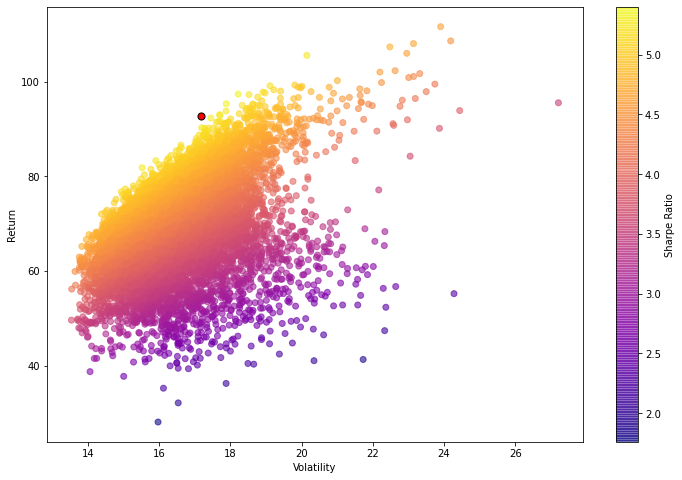

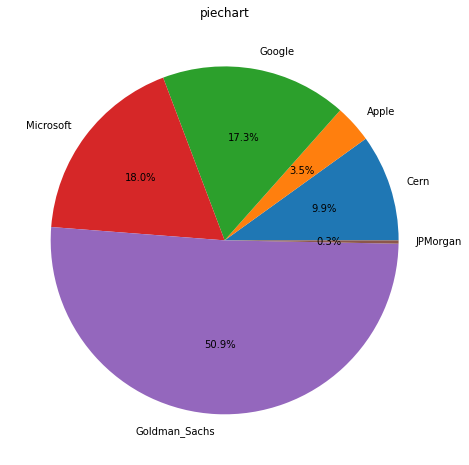

In [5]:
#1st case(based on 6 months data from 1st November 2020 to 30th April 2021)
stock="CERN AAPL GOOG MSFT GS JPM".split()
start="11/01/2020"
end="4/30/2021"
daily_returns=get_data(start,end,stock)
#1st try
n=10000
final(n,daily_returns)


Return           96.740337
Std              17.964112
Sharpe_Ratio      5.385200
Cern              0.032807
Apple             0.019852
Google            0.144219
Microsoft         0.248621
Goldman_Sachs     0.522364
JPMorgan          0.032137
Name: 5651, dtype: float64


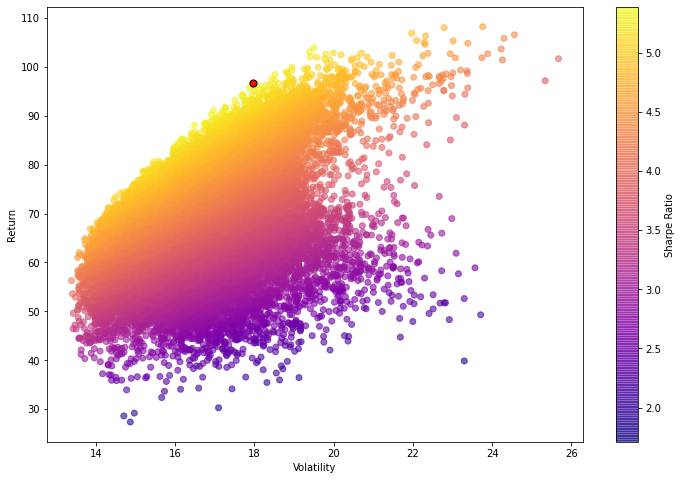

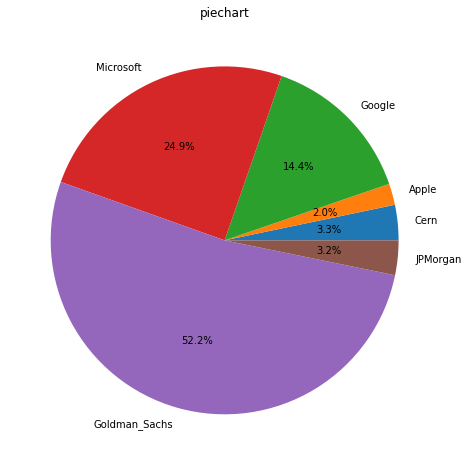

In [6]:
#2nd try
n=40000
final(n,daily_returns)

Return           100.422954
Std               18.637609
Sharpe_Ratio       5.388189
Cern               0.005100
Apple              0.030444
Google             0.298740
Microsoft          0.153775
Goldman_Sachs      0.499567
JPMorgan           0.012374
Name: 45181, dtype: float64


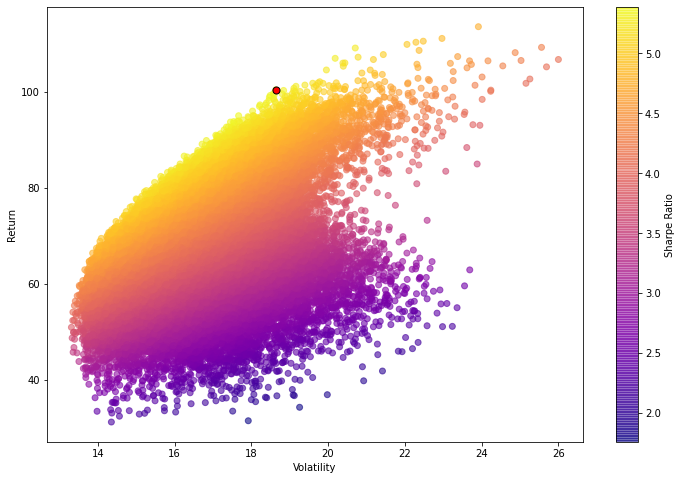

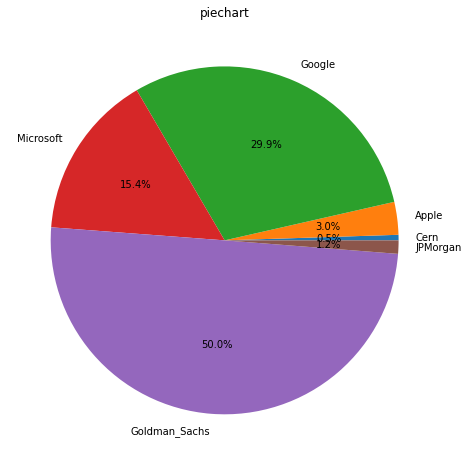

In [7]:
#3rd try
n=80000
final(n,daily_returns)

Return           65.662546
Std              23.837947
Sharpe_Ratio      2.754539
Cern              0.019650
Apple             0.205209
Google            0.317337
Microsoft         0.001368
Goldman_Sachs     0.411561
JPMorgan          0.044875
Name: 8031, dtype: float64


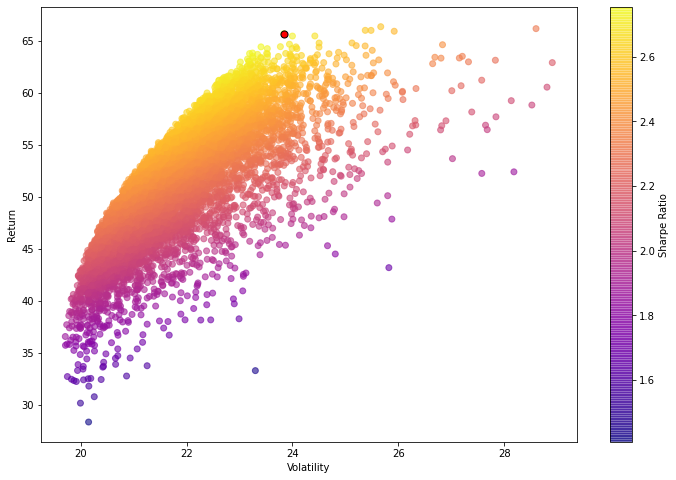

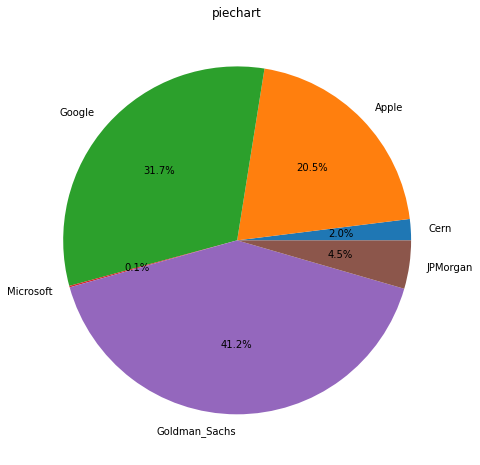

In [8]:
#2nd case(based on 12 months data from 1st May 2020 to 30th April 2021)
stock="CERN AAPL GOOG MSFT GS JPM".split()
start="05/01/2020"
end="4/30/2021"
daily_returns=get_data(start,end,stock)
#1st try
n=10000
final(n,daily_returns)

Return           65.465237
Std              23.602194
Sharpe_Ratio      2.773693
Cern              0.017653
Apple             0.196688
Google            0.387931
Microsoft         0.003815
Goldman_Sachs     0.375573
JPMorgan          0.018341
Name: 17458, dtype: float64


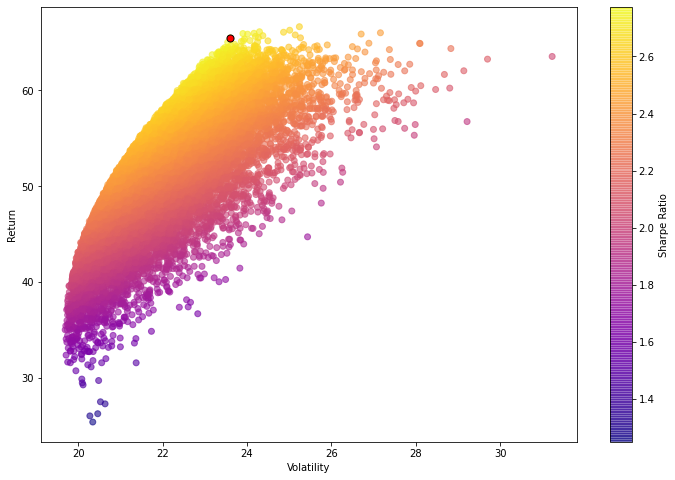

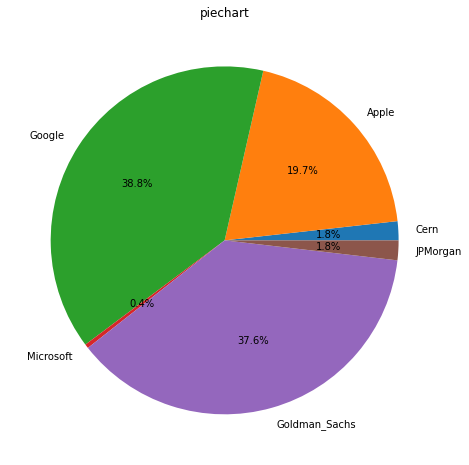

In [9]:
#2nd try
n=40000
final(n,daily_returns)

Return           65.032508
Std              23.485941
Sharpe_Ratio      2.768997
Cern              0.012941
Apple             0.256565
Google            0.335145
Microsoft         0.002890
Goldman_Sachs     0.320046
JPMorgan          0.072413
Name: 70518, dtype: float64


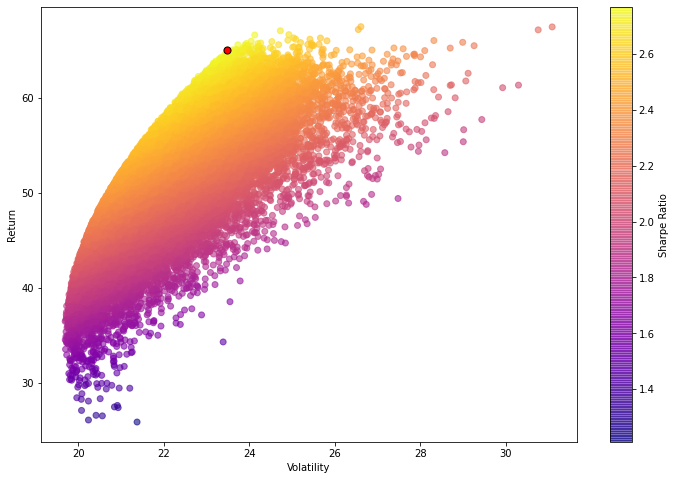

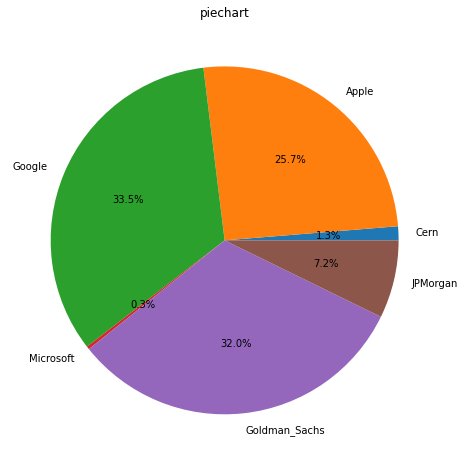

In [10]:
#3rd try
n=80000
final(n,daily_returns)